# Comparación de rendimiento para cálculo de determinantes
## Enfoque Iterativo vs Recursivo
- Bastián Ibañez Martínez
- Fundamentos de Inteligencia Artificial (Laboratorio)
- NRC: 8066

En esta tarea se crearon dos algoritmos destinados a calcular la determinante de una raíz cuadrada nxn.
Luego se comparó el rendimiento de los enfoques iterativo y recursivo para este problema.

El enfoque recursivo resultó ser el más eficiente a pequeña escala, es decir para matrices de dimensión 3x3 y 4x4.
Sin embargo presenta un crecimiento que asemeja una complejidad tipo factorial O(n!) por lo que rápidamente deja de ser viable para
matrices de mayor tamaño.

El enfoque iterativo resulta ser más lento por un factor de 100 aproximadamente para dimensiones pequeñas, pero rápidamente
se convierte en la solución más viable para mayores dimensiones, dado que presenta un crecimiento polinomial O(n^k).

In [3]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
MIN_DIMENSION = 3
MAX_DIMENSION = 12

In [5]:
class Matrix:
    def __init__(self, dimension=3, matrix: list = [], min=1, max=100) -> None:
        if dimension < 2:
            raise ValueError("Dimension debe ser mayor o igual a 2")

        self.min = min
        self.max = max
        self.dimension = dimension

        self.matrix = matrix
        if not matrix:
            self.matrix = self._build_matrix()

    def _get_randint(self) -> int:
        return random.randint(self.min, self.max)

    def _build_matrix(self) -> list:
        return [
            [self._get_randint() for _ in range(self.dimension)]
            for _ in range(self.dimension)
        ]

    def get_matrix(self) -> list:
        return self.matrix

    def get_determinant_recursive(self):
        return RecursiveDeterminant.get(self)

    def get_determinant_iterative(self):
        return IterativeDeterminant.get(self)

    def __str__(self) -> str:
        out = ""
        for row in self.get_matrix():
            out += f"{' '.join(map(str, row))}\n"
        return "---\n" + out + "---\n"

In [6]:
class RecursiveDeterminant:
    @staticmethod
    def _get_mult(pos: int, num: int):
        return (-1) ** pos * num

    @staticmethod
    def _get_sub_matrix(pos: int, matrix_list: list):
        sub_mat = []
        for row in matrix_list[1:]:
            sub_row = []
            for j, val in enumerate(row):
                if j == pos:
                    continue
                sub_row.append(val)
            sub_mat.append(sub_row)
        return sub_mat

    @staticmethod
    def recurse(matrix_list: list):
        det = 0

        if len(matrix_list) == 2:
            a, b = matrix_list[0]
            c, d = matrix_list[1]
            return a * d - b * c

        for pos, num in enumerate(matrix_list[0]):
            mult = RecursiveDeterminant._get_mult(pos, num)
            sub_matrix = RecursiveDeterminant._get_sub_matrix(pos, matrix_list)
            det += mult * RecursiveDeterminant.recurse(sub_matrix)
        return det

    @staticmethod
    def get(matrix: Matrix):
        matrix_list = matrix.get_matrix()
        result = RecursiveDeterminant.recurse(matrix_list)
        return round(result)

In [7]:
class IterativeDeterminant:
    @staticmethod
    def add_row(row1, row2):
        return [round(val1 + val2, 15) for val1, val2 in zip(row1, row2)]

    @staticmethod
    def multiply_row(mult, row):
        return [mult * val for val in row]

    @staticmethod
    def find_mult(pos, row_to_modify, row_to_multiply):
        mult = -row_to_modify[pos] / row_to_multiply[pos]
        new_row = IterativeDeterminant.multiply_row(mult, row_to_multiply)
        return new_row

    @staticmethod
    def zero_value(pos, row_to_modify, row_to_multiply):
        zero_row = IterativeDeterminant.find_mult(pos, row_to_modify, row_to_multiply)
        new_row = IterativeDeterminant.add_row(row_to_modify, zero_row)
        return new_row

    @staticmethod
    def get_triangular_form(matrix_list: list):
        i = 0
        while i < len(matrix_list):
            row_to_multiply = matrix_list[i]
            for row_idx in range(i + 1, len(matrix_list)):
                row_to_modify = matrix_list[row_idx]
                new_row = IterativeDeterminant.zero_value(
                    i, row_to_modify, row_to_multiply
                )
                matrix_list[row_idx] = new_row
            i += 1
        return matrix_list

    @staticmethod
    def get(matrix: Matrix):
        matrix_list = matrix.get_matrix()
        triangular_form = IterativeDeterminant.get_triangular_form(matrix_list)
        det = 1
        for i, _ in enumerate(triangular_form):
            det *= triangular_form[i][i]
        return round(det)

In [8]:
def compare_algs(min_dimension=3, max_dimension=10):

    dimensions = []
    iterative_times = []
    recursive_times = []
    
    for i in range(min_dimension, max_dimension + 1):
        matrix = Matrix(i)
        recursive_start = time.time()
        matrix.get_determinant_recursive()
        recursive_end = time.time()

        iterative_start = time.time()
        matrix.get_determinant_iterative()
        iterative_end = time.time()

        recursive_time = recursive_end - recursive_start
        iterative_time = iterative_end - iterative_start

        dimensions.append(i)
        recursive_times.append(recursive_time)
        iterative_times.append(iterative_time)

    return pd.DataFrame({
        'dimension': dimensions,
        'recursive_time': recursive_times,
        'iterative_time': iterative_times
    })

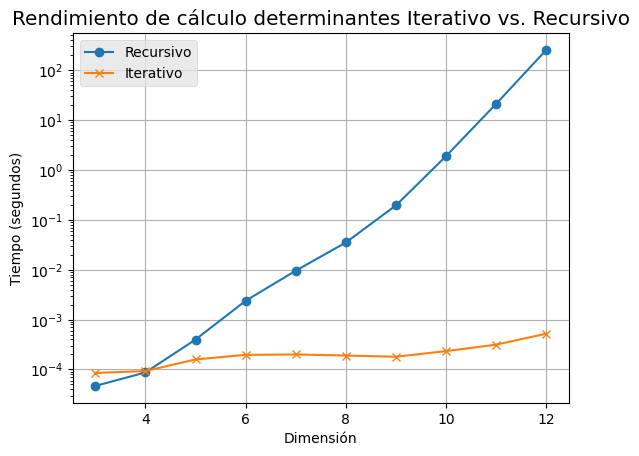

In [9]:
df = compare_algs(MIN_DIMENSION, MAX_DIMENSION)
plt.plot(df['dimension'], df['recursive_time'], label='Recursivo', marker='o')
plt.plot(df['dimension'], df['iterative_time'], label='Iterativo', marker='x')
plt.style.use('ggplot')
plt.yscale('log')
plt.xlabel('Dimensión')
plt.ylabel('Tiempo (segundos)')
plt.title('Rendimiento de cálculo determinantes Iterativo vs. Recursivo')

# Add a legend to distinguish the lines
plt.legend()

# Add a grid for better readability
plt.grid(True)